In [1]:
# import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# bet of hands
BET_BANKER = "banker"
BET_PLAYER = "player"
BET_TIE = "tie"

# house name
NAME_HOUSE = "House"

# probability occurance of bet of hands
probability_banker = 45
probability_player = 45
probability_tie = 10
# payout ratio
win_payout = 1
tie_payout = 8
# 5% commission for the house
banker_win_commission = 0.05
# each player's initial balance
initial_balance = 10000000

FIG_WIDTH = 16
FIG_HEIGHT = 10

'''
Two players bet on banker and player respectively with different amount
* 2 players play baccarat
* player 1 bet on banker with excessive amount more than player 2
* player 2 bet on player with way less amount
* the probability settings defined in cell "configuration settings"
* this test aims to evaluate the long term result after many rounds (>1000) of playing
'''


'\nTwo players bet on banker and player respectively with different amount\n* 2 players play baccarat\n* player 1 bet on banker with excessive amount more than player 2\n* player 2 bet on player with way less amount\n* the probability settings defined in cell "configuration settings"\n* this test aims to evaluate the long term result after many rounds (>1000) of playing\n'

In [2]:
class Player:
    def __init__(self, name, balance):
        self.name = name
        self.initial_amount = balance
        self.balance = balance
        self.bet = ""
        self.bet_amount = 0
    def place_bet(self, bet, amount):
        self.bet_hand = bet
        self.bet_amount = amount
    def pay_collect(self, result):
        win_loss = 0
        if self.bet_hand == "":
            # player did not bet, no win nor lose
            pass
        elif result == self.bet_hand:
            # player's bet correct
            payout = 0
            win_commission = 0
            if result == BET_BANKER:
                payout = win_payout
                win_commission = banker_win_commission
            elif result == BET_PLAYER:
                payout = win_payout
            elif result == BET_TIE:
                payout = tie_payout
            win = payout * self.bet_amount
            win_loss = win * (1 - win_commission)
        else:
            # player's bet incorrect
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            else:
                payout = 0
            win_loss = -1 * payout * self.bet_amount
        self.balance += win_loss
        return win_loss

class Baccarat:
    def __init__(self, player, probability_banker, probability_player, probability_tie):
        self.player = player
        self.probability_banker = probability_banker
        self.probability_player = probability_player
        self.probability_tie = probability_tie
        self.balance = 0
        self.bet_record = []
        self.record_index = 0
    def deal(self):
        num_random = random.randrange(0, 100)
        if num_random < self.probability_banker:
            result = BET_BANKER
        elif num_random < (self.probability_banker + self.probability_player):
            result = BET_PLAYER
        else:
            result = BET_TIE
        return result
    def conclude(self, result):
        profitloss = 0
        for i in player:
            win_loss = player[i].pay_collect(result)
            self.bet_record.append({"match": self.record_index, "result": result, "player": player[i].name, "winloss": win_loss})
            profitloss -= win_loss
        self.balance += profitloss
        self.bet_record.append({"match": self.record_index, "result": result, "player": NAME_HOUSE, "winloss": profitloss})
        self.record_index += 1
    def print(self):
        print("result player winloss")
        for record in self.bet_record:
            print("{0} {1} {2}".format(record['result'], record['player'], record['winloss']))
    def df(self):
        df = pd.DataFrame.from_dict(self.bet_record)
        return df

def show_result(bet_record_df):
    # plot balanace
    display(HTML('<h3>All players cumulative balance</h3>'))
    df_winloss = bet_record_df[['match', 'player', 'winloss']]
    df = df_winloss.pivot(index=['match'], columns=['player'], values=['winloss'])
    df_cumsum_all = df.cumsum()
    df_cumsum_all.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    plt.show()
    # display(HTML('<h3>House cumulative balance</h3>'))
    # df_cumsum_1 = df_cumsum_all['winloss'][NAME_HOUSE]
    # df_cumsum_1.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    # plt.show()

    # show statistic
    display(HTML('<h3>Game result statistic</h3>'))
    display(HTML('<h4>Number of matches played</h4>'))
    player_group = bet_record_df.groupby('player')
    num_matches = player_group.get_group(NAME_HOUSE)['match'].count()
    print(num_matches)
    display(HTML('<h4>Percentage occurence of different result</h4>'))
    print(player_group.get_group(NAME_HOUSE).value_counts(['result'], normalize=True))
    display(HTML('<h4>Win-Loss after final match</h4>'))
    print(df_cumsum_all['winloss'].iloc[[-1]])
    display(HTML('<h4>Max draw-down</h4>'))
    print(df_cumsum_all['winloss'].min())


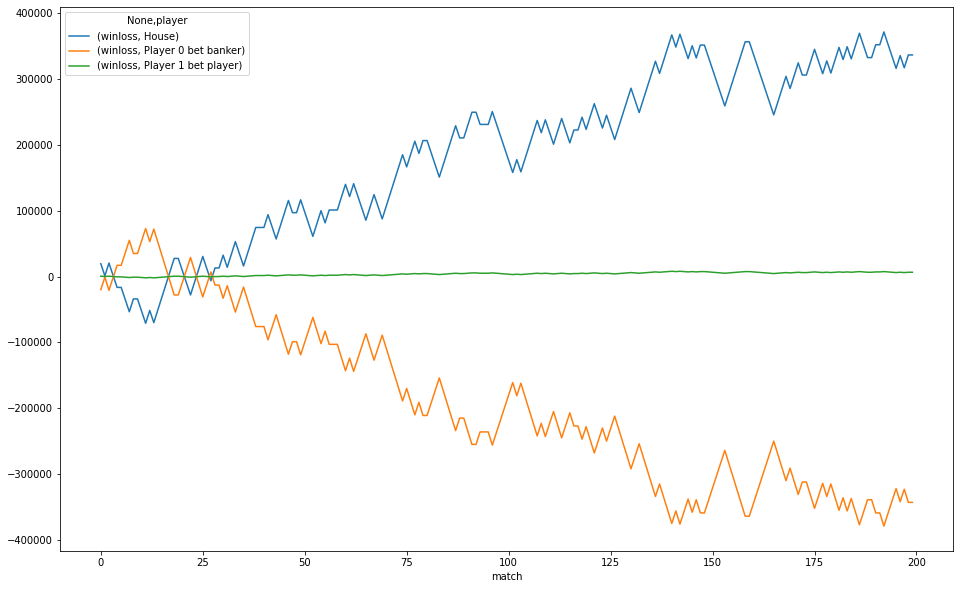

200


result
player    0.480
banker    0.415
tie       0.105
dtype: float64


player     House  Player 0 bet banker  Player 1 bet player
match                                                     
199     336500.0            -343000.0               6500.0


player
House                  -71000.0
Player 0 bet banker   -379000.0
Player 1 bet player     -2000.0
dtype: float64


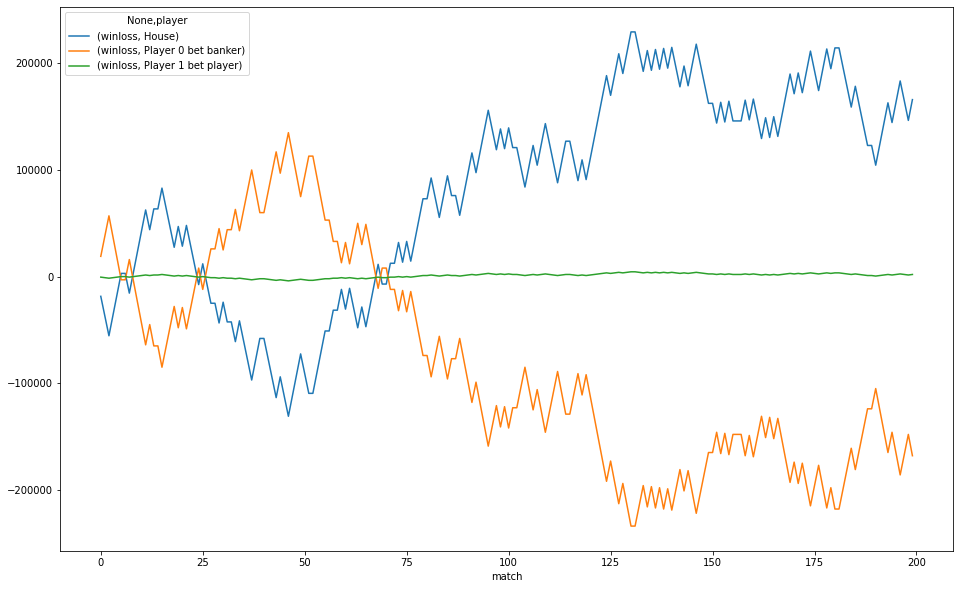

200


result
player    0.46
banker    0.44
tie       0.10
dtype: float64


player     House  Player 0 bet banker  Player 1 bet player
match                                                     
199     166000.0            -168000.0               2000.0


player
House                 -131000.0
Player 0 bet banker   -234000.0
Player 1 bet player     -4000.0
dtype: float64


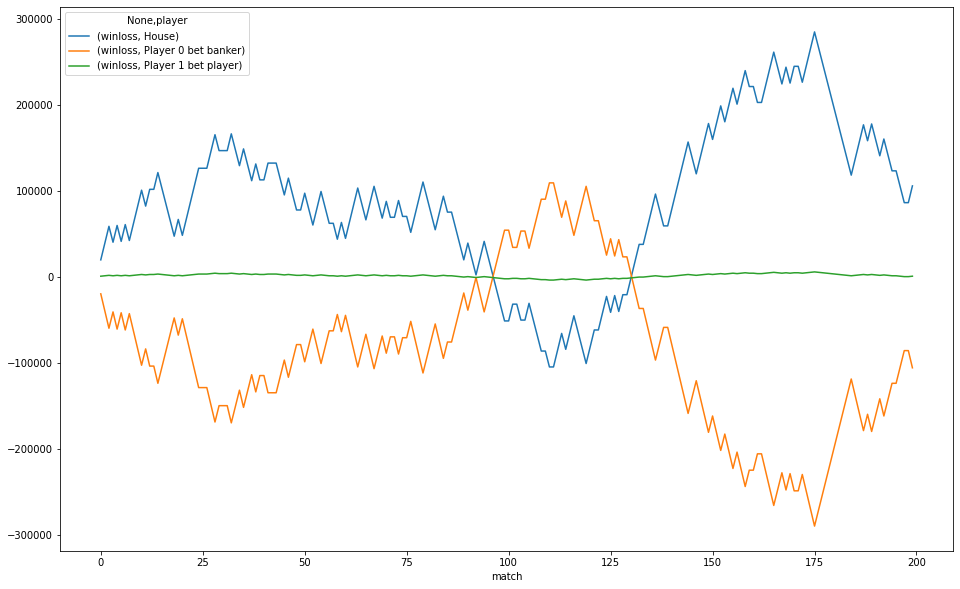

200


result
player    0.435
banker    0.430
tie       0.135
dtype: float64


player     House  Player 0 bet banker  Player 1 bet player
match                                                     
199     105500.0            -106000.0                500.0


player
House                 -105000.0
Player 0 bet banker   -290000.0
Player 1 bet player     -4000.0
dtype: float64


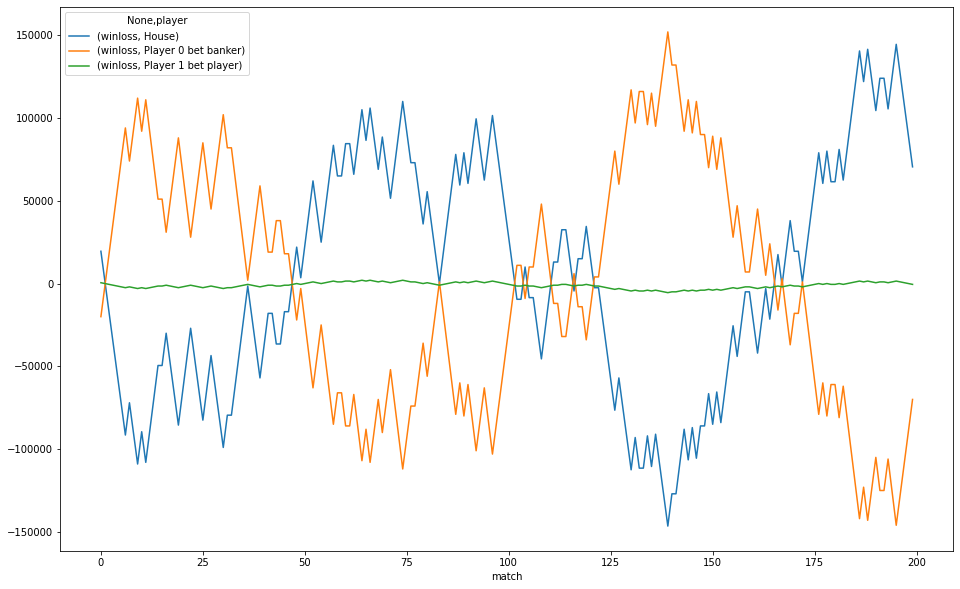

200


result
banker    0.450
player    0.445
tie       0.105
dtype: float64


player    House  Player 0 bet banker  Player 1 bet player
match                                                    
199     70500.0             -70000.0               -500.0


player
House                 -146500.0
Player 0 bet banker   -146000.0
Player 1 bet player     -5500.0
dtype: float64


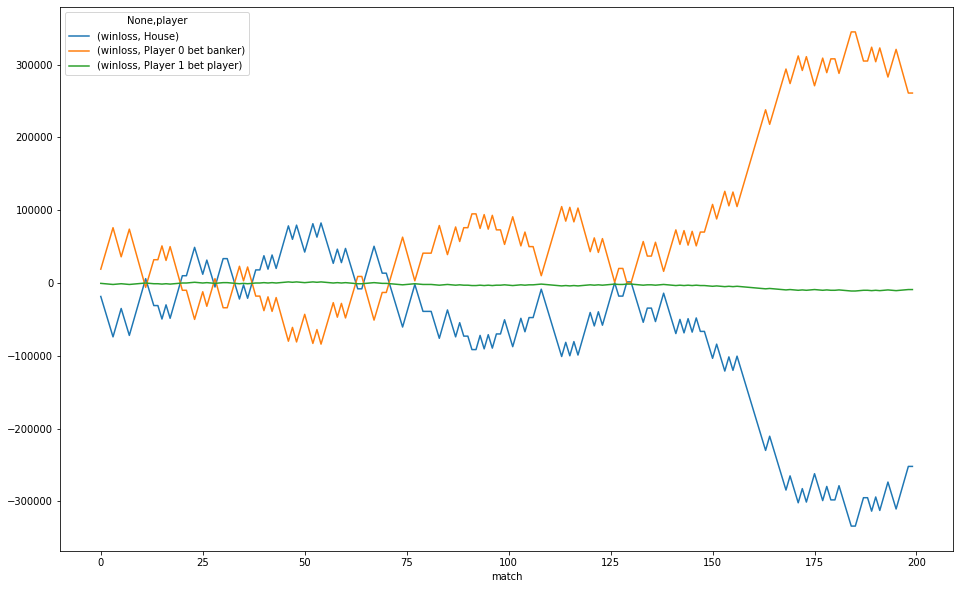

200


result
banker    0.495
player    0.405
tie       0.100
dtype: float64


player     House  Player 0 bet banker  Player 1 bet player
match                                                     
199    -252000.0             261000.0              -9000.0


player
House                 -334000.0
Player 0 bet banker    -84000.0
Player 1 bet player    -11000.0
dtype: float64


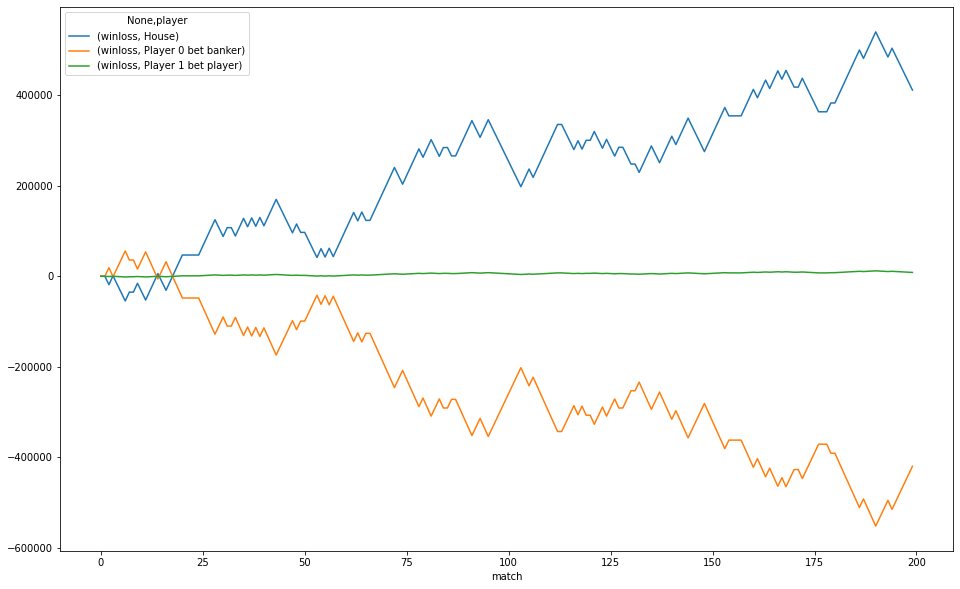

200


result
player    0.485
banker    0.400
tie       0.115
dtype: float64


player     House  Player 0 bet banker  Player 1 bet player
match                                                     
199     411500.0            -420000.0               8500.0


player
House                  -54500.0
Player 0 bet banker   -552000.0
Player 1 bet player     -1500.0
dtype: float64


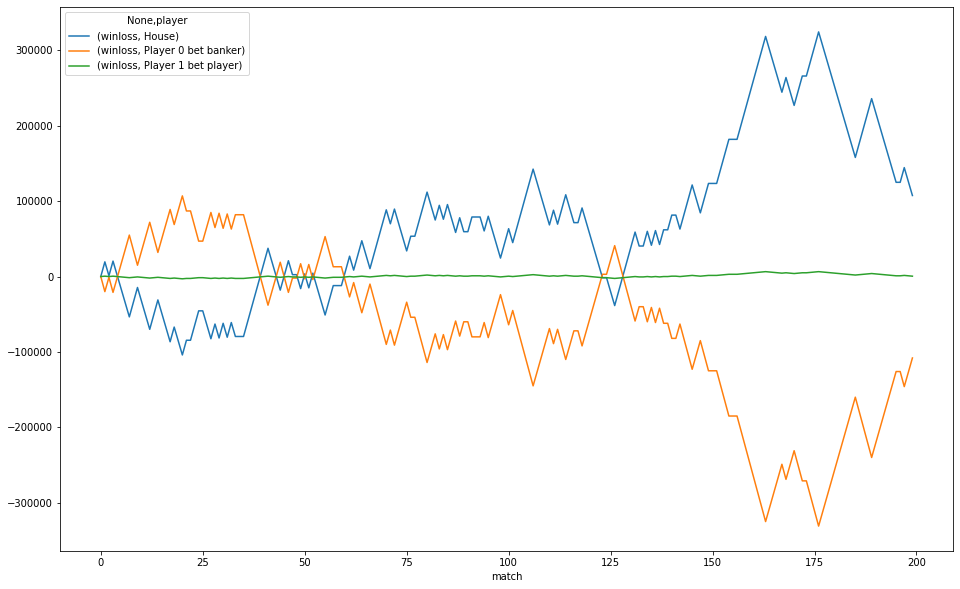

200


result
player    0.445
banker    0.440
tie       0.115
dtype: float64


player     House  Player 0 bet banker  Player 1 bet player
match                                                     
199     107500.0            -108000.0                500.0


player
House                 -104000.0
Player 0 bet banker   -331000.0
Player 1 bet player     -3000.0
dtype: float64


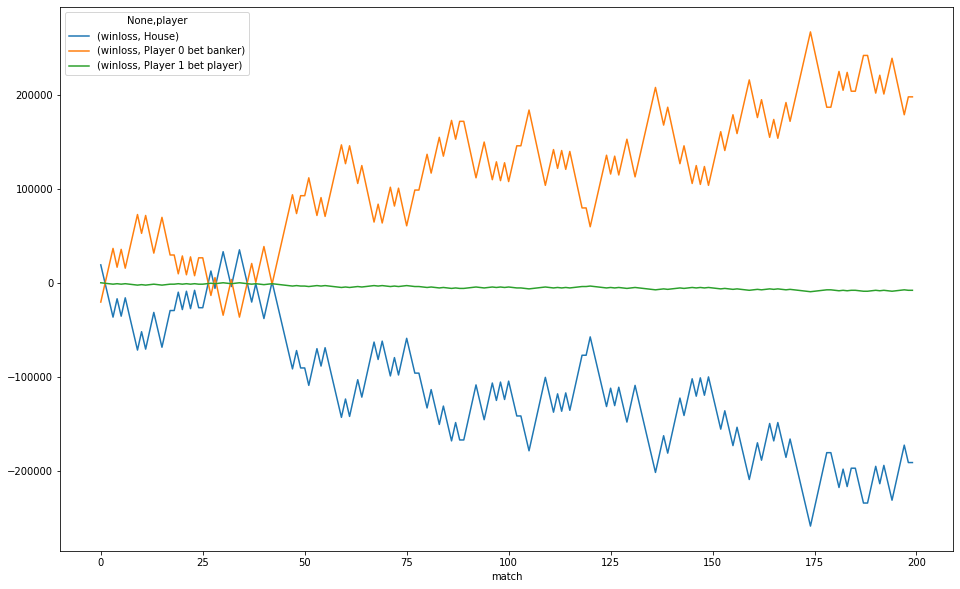

200


result
banker    0.510
player    0.435
tie       0.055
dtype: float64


player     House  Player 0 bet banker  Player 1 bet player
match                                                     
199    -190500.0             198000.0              -7500.0


player
House                 -258000.0
Player 0 bet banker    -36000.0
Player 1 bet player     -9000.0
dtype: float64


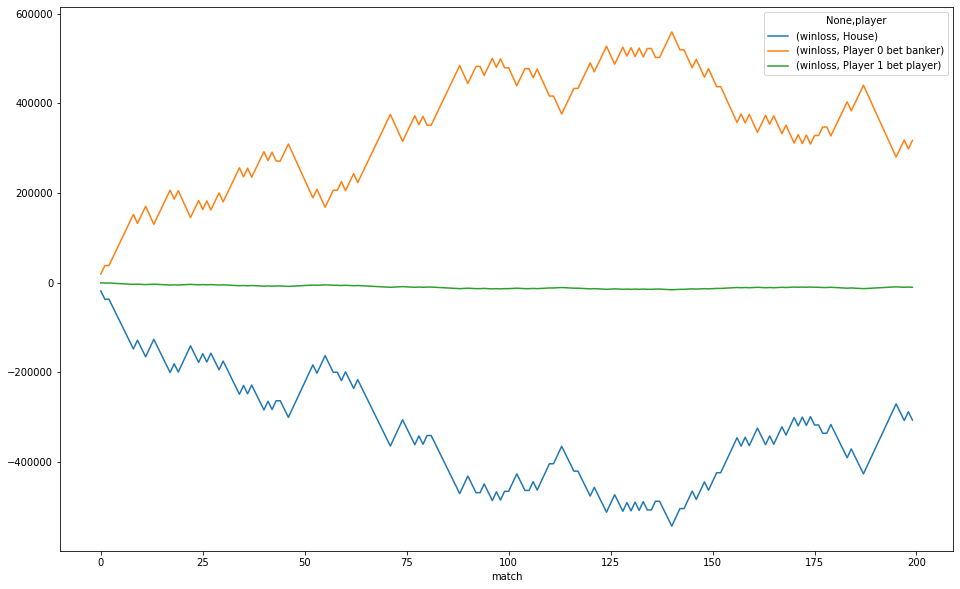

200


result
banker    0.515
player    0.410
tie       0.075
dtype: float64


player     House  Player 0 bet banker  Player 1 bet player
match                                                     
199    -306500.0             317000.0             -10500.0


player
House                 -543000.0
Player 0 bet banker     19000.0
Player 1 bet player    -16000.0
dtype: float64


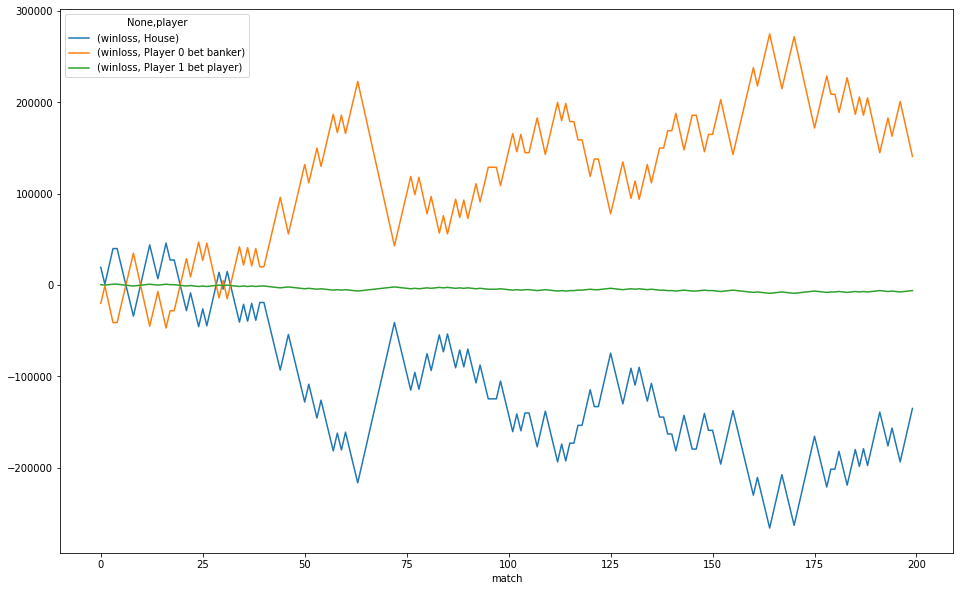

200


result
banker    0.495
player    0.435
tie       0.070
dtype: float64


player     House  Player 0 bet banker  Player 1 bet player
match                                                     
199    -135000.0             141000.0              -6000.0


player
House                 -266000.0
Player 0 bet banker    -47000.0
Player 1 bet player     -9000.0
dtype: float64


In [3]:
# Test case 1
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# Conclusion
# * win-loss seems random
num_test = 10
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 1 - Two player different bet amount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


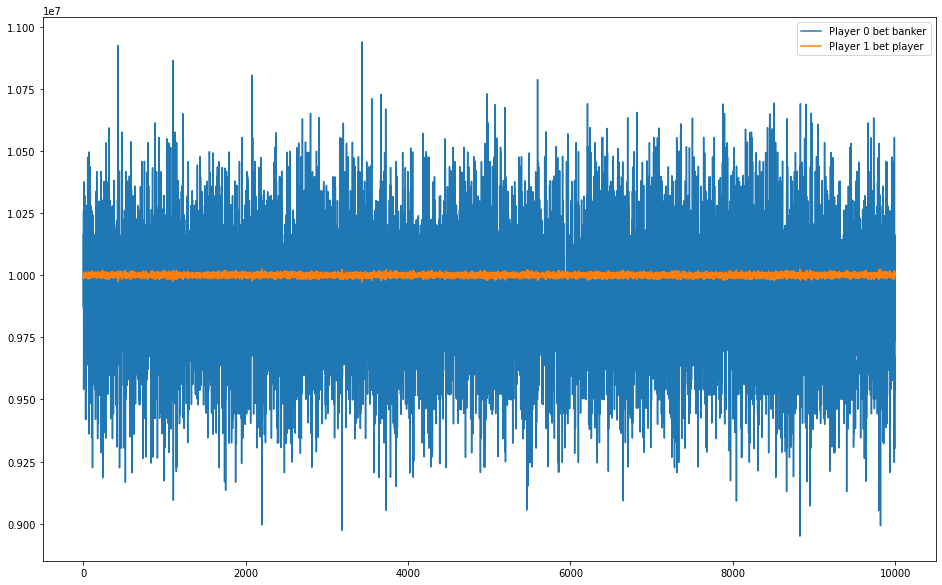

Player 0 bet banker  Player 1 bet player
count         1.000000e+04         1.000000e+04
mean          9.908405e+06         1.000004e+07
std           2.610862e+05         6.693847e+03
min           8.950000e+06         9.973500e+06
25%           9.735000e+06         9.995500e+06
50%           9.910000e+06         1.000000e+07
75%           1.008400e+07         1.000450e+07
max           1.093900e+07         1.002450e+07

In [4]:
# Test case 2
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# * increase the sample to very large to see if there is any pattern
num_test = 10 * 1000
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 2 - Two player different bet amount large samples:</h1>'))
playerWinLoss = []
for imatch, num_matches in enumerate(test_matches):
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    test_result = {}
    for i in player:
        test_result[player[i].name] = player[i].balance
    playerWinLoss.append(test_result)
df = pd.DataFrame.from_dict(playerWinLoss)
df.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.show()
df.describe()


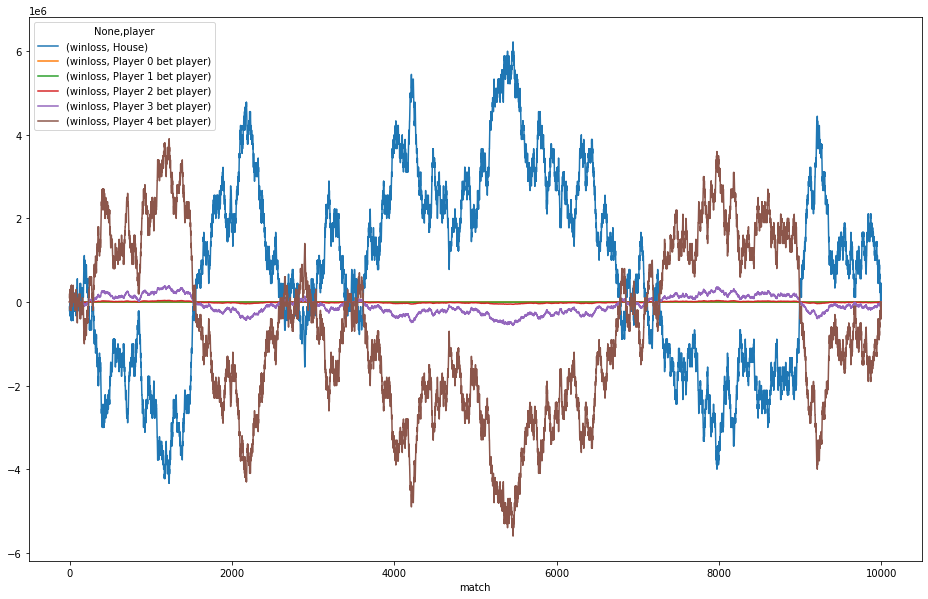

10000


result
banker    0.4494
player    0.4490
tie       0.1016
dtype: float64


player   House  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                           
9999    444440                  -40                 -400                -4000   

player  Player 3 bet player  Player 4 bet player  
match                                             
9999                 -40000              -400000  


player
House                 -4333290
Player 0 bet player       -560
Player 1 bet player      -5600
Player 2 bet player     -56000
Player 3 bet player    -560000
Player 4 bet player   -5600000
dtype: int64


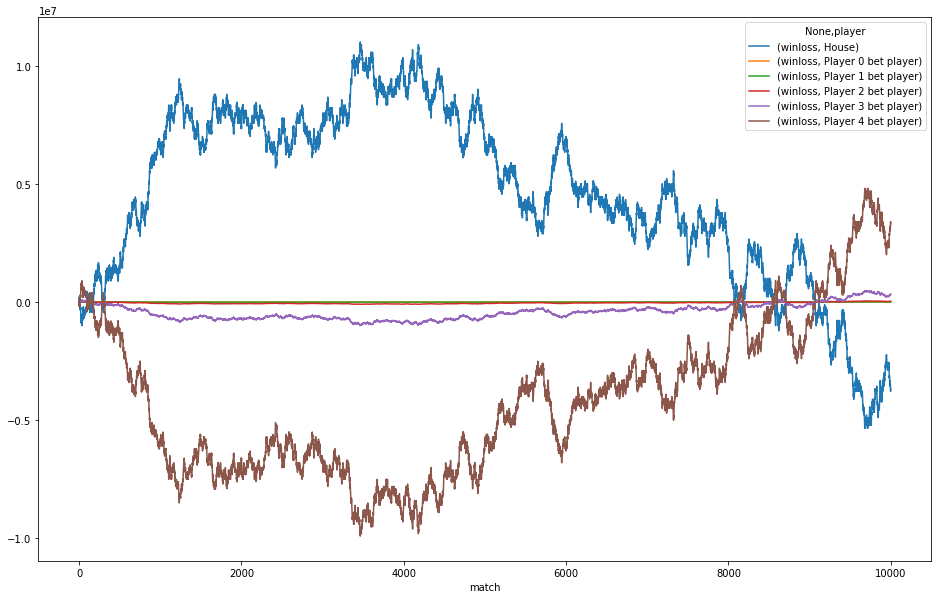

10000


result
player    0.4527
banker    0.4494
tie       0.0979
dtype: float64


player    House  Player 0 bet player  Player 1 bet player  \
match                                                       
9999   -3666630                  330                 3300   

player  Player 2 bet player  Player 3 bet player  Player 4 bet player  
match                                                                  
9999                  33000               330000              3300000  


player
House                 -5333280
Player 0 bet player       -990
Player 1 bet player      -9900
Player 2 bet player     -99000
Player 3 bet player    -990000
Player 4 bet player   -9900000
dtype: int64


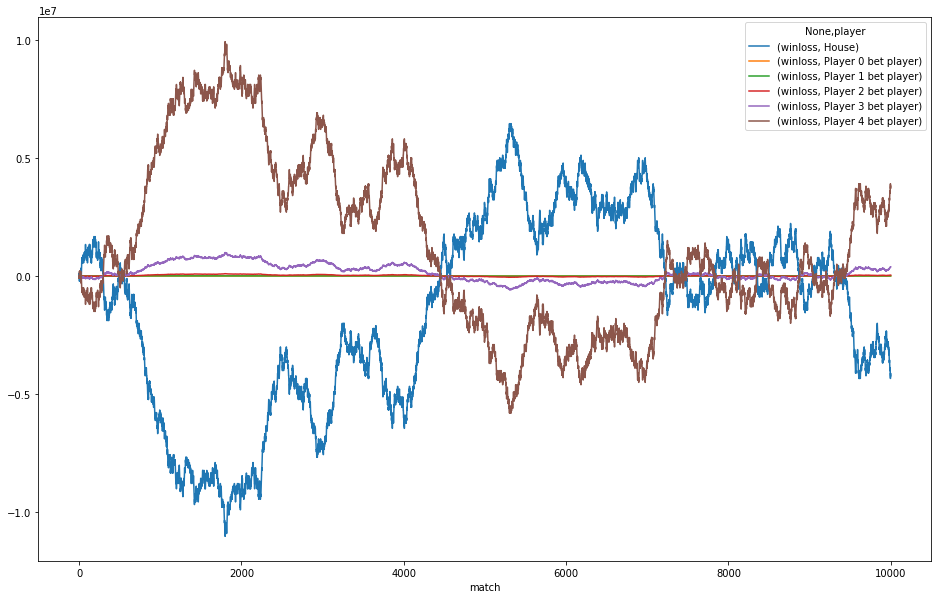

10000


result
player    0.4510
banker    0.4472
tie       0.1018
dtype: float64


player    House  Player 0 bet player  Player 1 bet player  \
match                                                       
9999   -4222180                  380                 3800   

player  Player 2 bet player  Player 3 bet player  Player 4 bet player  
match                                                                  
9999                  38000               380000              3800000  


player
House                 -10999890
Player 0 bet player        -580
Player 1 bet player       -5800
Player 2 bet player      -58000
Player 3 bet player     -580000
Player 4 bet player    -5800000
dtype: int64


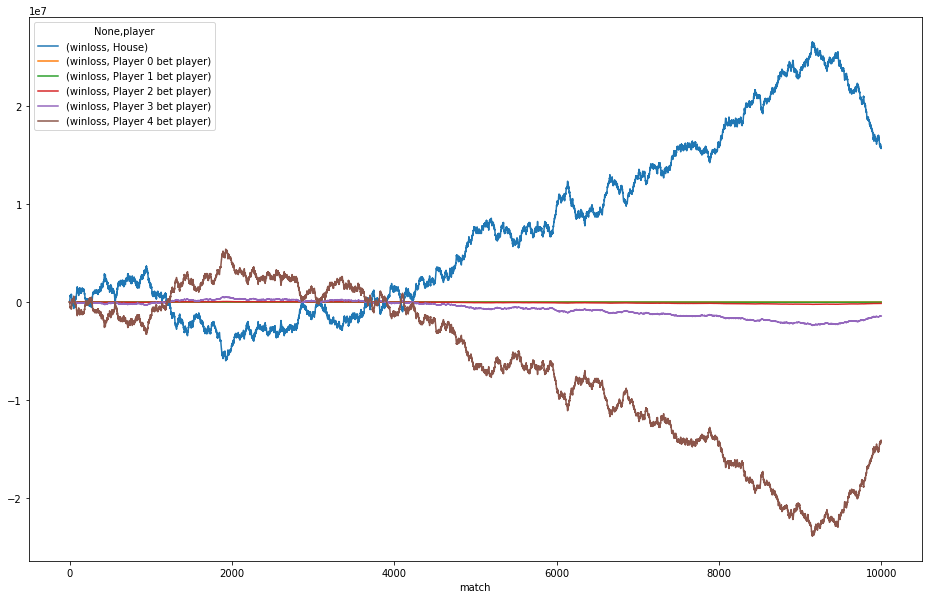

10000


result
banker    0.4584
player    0.4442
tie       0.0974
dtype: float64


player     House  Player 0 bet player  Player 1 bet player  \
match                                                        
9999    15777620                -1420               -14200   

player  Player 2 bet player  Player 3 bet player  Player 4 bet player  
match                                                                  
9999                -142000             -1420000            -14200000  


player
House                  -5999940
Player 0 bet player       -2390
Player 1 bet player      -23900
Player 2 bet player     -239000
Player 3 bet player    -2390000
Player 4 bet player   -23900000
dtype: int64


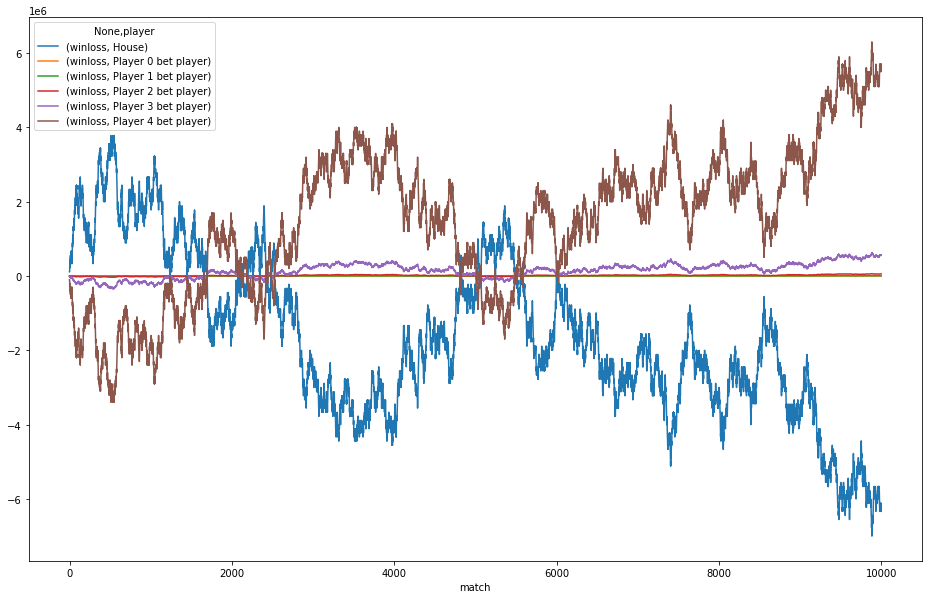

10000


result
player    0.4532
banker    0.4475
tie       0.0993
dtype: float64


player    House  Player 0 bet player  Player 1 bet player  \
match                                                       
9999   -6333270                  570                 5700   

player  Player 2 bet player  Player 3 bet player  Player 4 bet player  
match                                                                  
9999                  57000               570000              5700000  


player
House                 -6999930
Player 0 bet player       -340
Player 1 bet player      -3400
Player 2 bet player     -34000
Player 3 bet player    -340000
Player 4 bet player   -3400000
dtype: int64


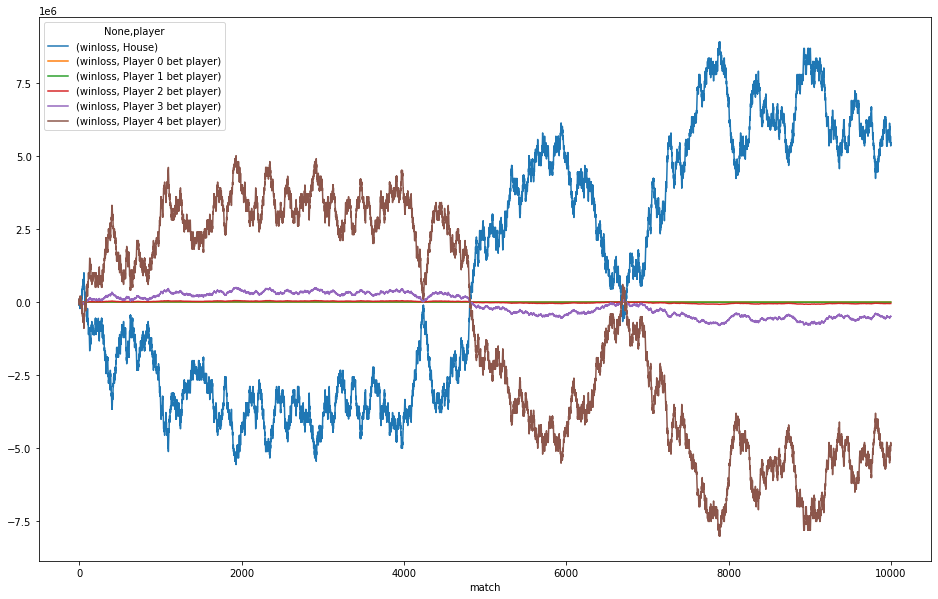

10000


result
banker    0.4521
player    0.4472
tie       0.1007
dtype: float64


player    House  Player 0 bet player  Player 1 bet player  \
match                                                       
9999    5444390                 -490                -4900   

player  Player 2 bet player  Player 3 bet player  Player 4 bet player  
match                                                                  
9999                 -49000              -490000             -4900000  


player
House                 -5555500
Player 0 bet player       -800
Player 1 bet player      -8000
Player 2 bet player     -80000
Player 3 bet player    -800000
Player 4 bet player   -8000000
dtype: int64


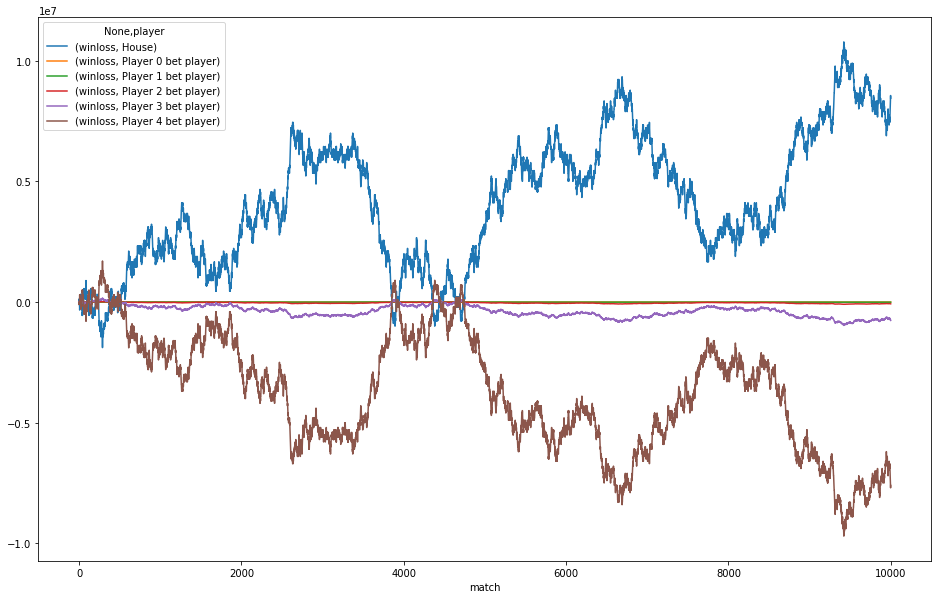

10000


result
banker    0.4523
player    0.4447
tie       0.1030
dtype: float64


player    House  Player 0 bet player  Player 1 bet player  \
match                                                       
9999    8444360                 -760                -7600   

player  Player 2 bet player  Player 3 bet player  Player 4 bet player  
match                                                                  
9999                 -76000              -760000             -7600000  


player
House                 -1888870
Player 0 bet player       -970
Player 1 bet player      -9700
Player 2 bet player     -97000
Player 3 bet player    -970000
Player 4 bet player   -9700000
dtype: int64


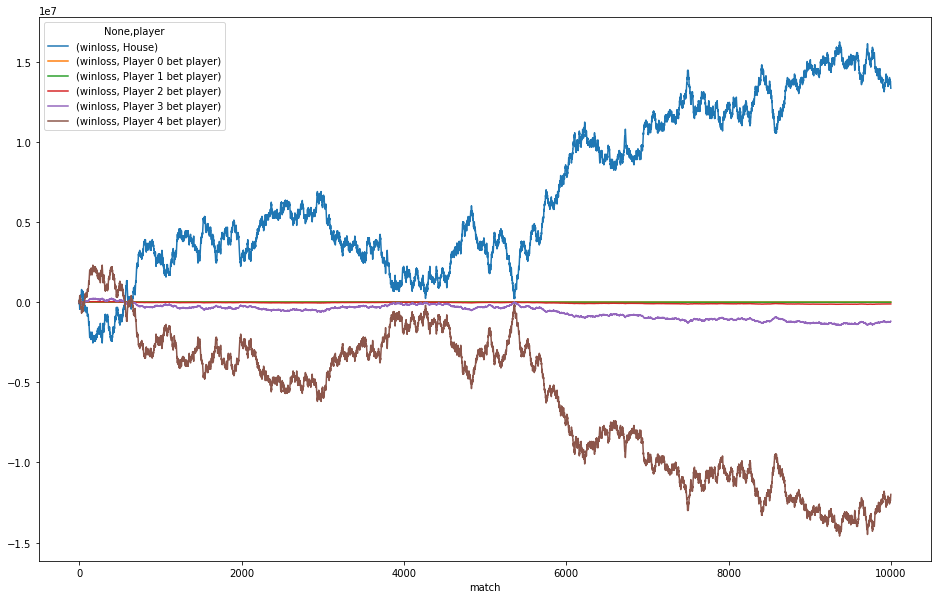

10000


result
banker    0.4564
player    0.4444
tie       0.0992
dtype: float64


player     House  Player 0 bet player  Player 1 bet player  \
match                                                        
9999    13333200                -1200               -12000   

player  Player 2 bet player  Player 3 bet player  Player 4 bet player  
match                                                                  
9999                -120000             -1200000            -12000000  


player
House                  -2555530
Player 0 bet player       -1460
Player 1 bet player      -14600
Player 2 bet player     -146000
Player 3 bet player    -1460000
Player 4 bet player   -14600000
dtype: int64


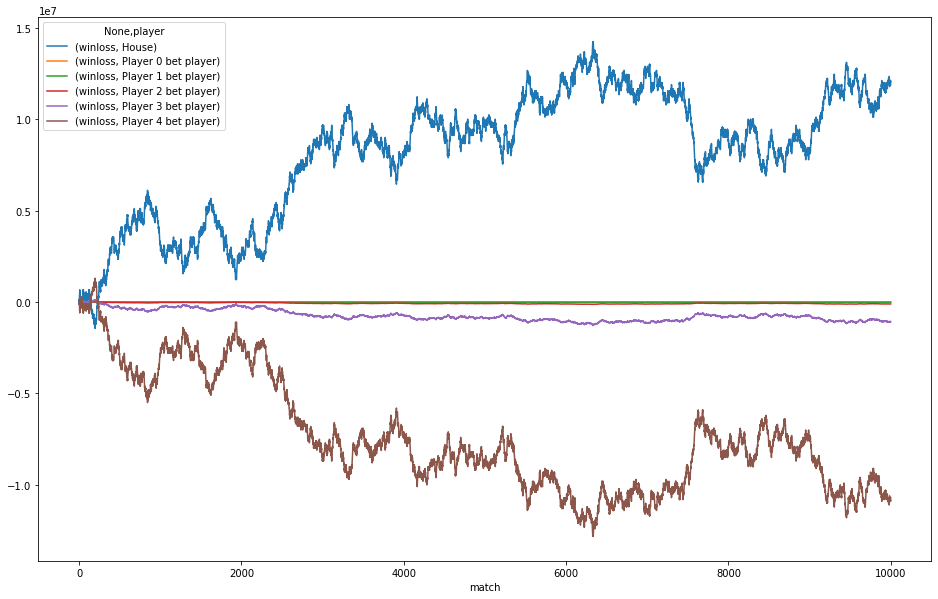

10000


result
banker    0.4548
player    0.4441
tie       0.1011
dtype: float64


player     House  Player 0 bet player  Player 1 bet player  \
match                                                        
9999    11888770                -1070               -10700   

player  Player 2 bet player  Player 3 bet player  Player 4 bet player  
match                                                                  
9999                -107000             -1070000            -10700000  


player
House                  -1444430
Player 0 bet player       -1280
Player 1 bet player      -12800
Player 2 bet player     -128000
Player 3 bet player    -1280000
Player 4 bet player   -12800000
dtype: int64


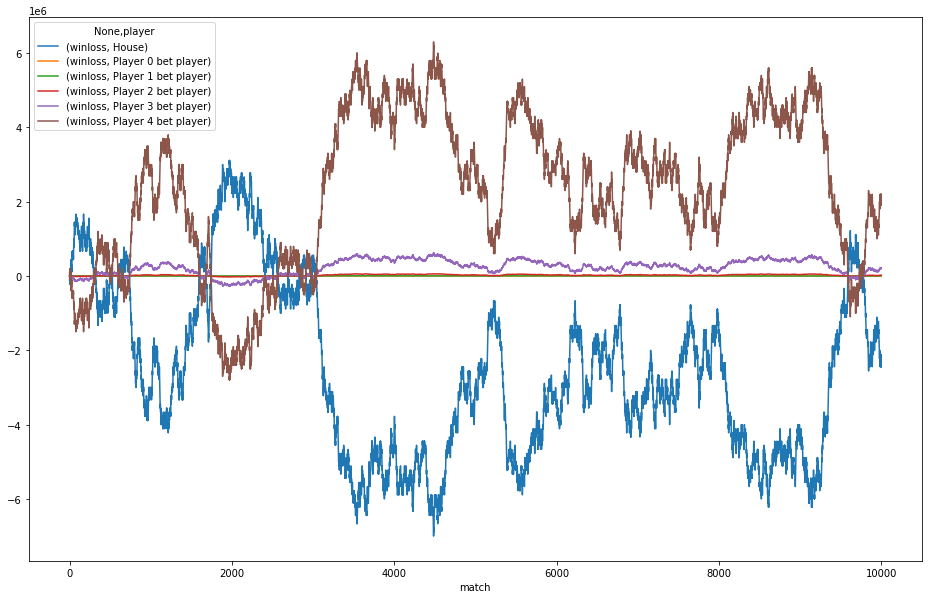

10000


result
player    0.4485
banker    0.4463
tie       0.1052
dtype: float64


player    House  Player 0 bet player  Player 1 bet player  \
match                                                       
9999   -2444420                  220                 2200   

player  Player 2 bet player  Player 3 bet player  Player 4 bet player  
match                                                                  
9999                  22000               220000              2200000  


player
House                 -6999930
Player 0 bet player       -280
Player 1 bet player      -2800
Player 2 bet player     -28000
Player 3 bet player    -280000
Player 4 bet player   -2800000
dtype: int64


In [5]:
# Test case 3
# * define many players and their bet hand and amount
# * each player's bet amount is different in order to show their relationship
# Conclusion
num_test = 10
num_matches = 10000
bets = [
    {'bet': BET_PLAYER, 'amount': 10},
    {'bet': BET_PLAYER, 'amount': 100},
    {'bet': BET_PLAYER, 'amount': 1000},
    {'bet': BET_PLAYER, 'amount': 10000},
    {'bet': BET_PLAYER, 'amount': 100000},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 3 - Different player different bet amount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


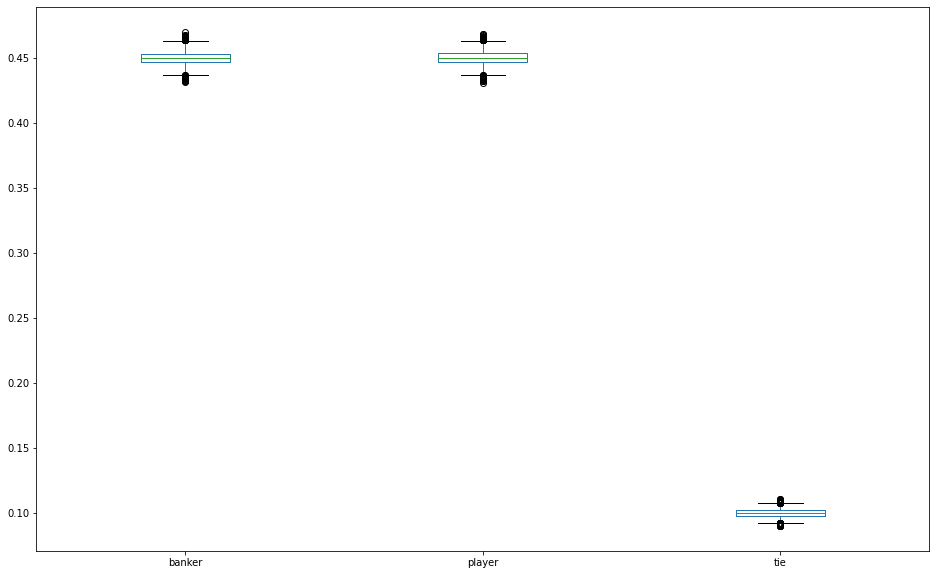

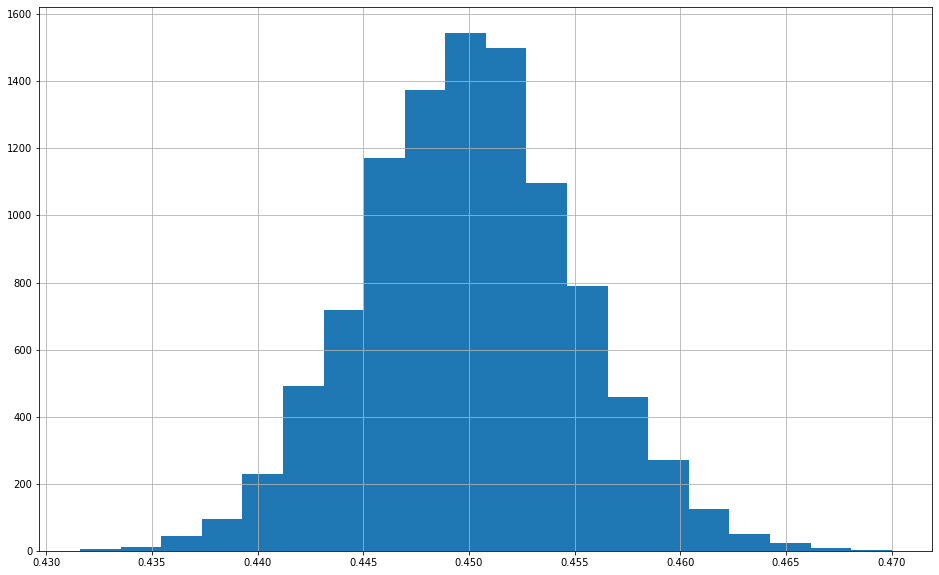

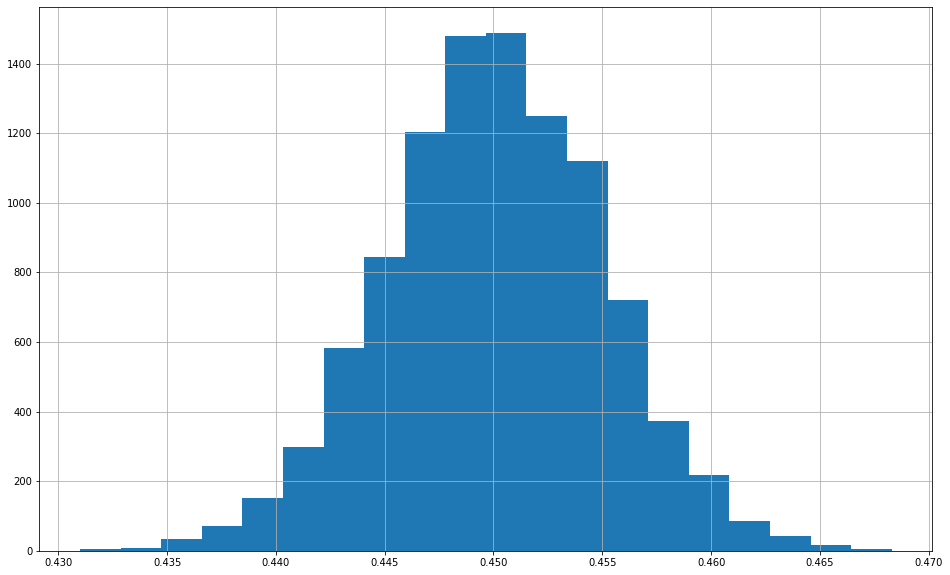

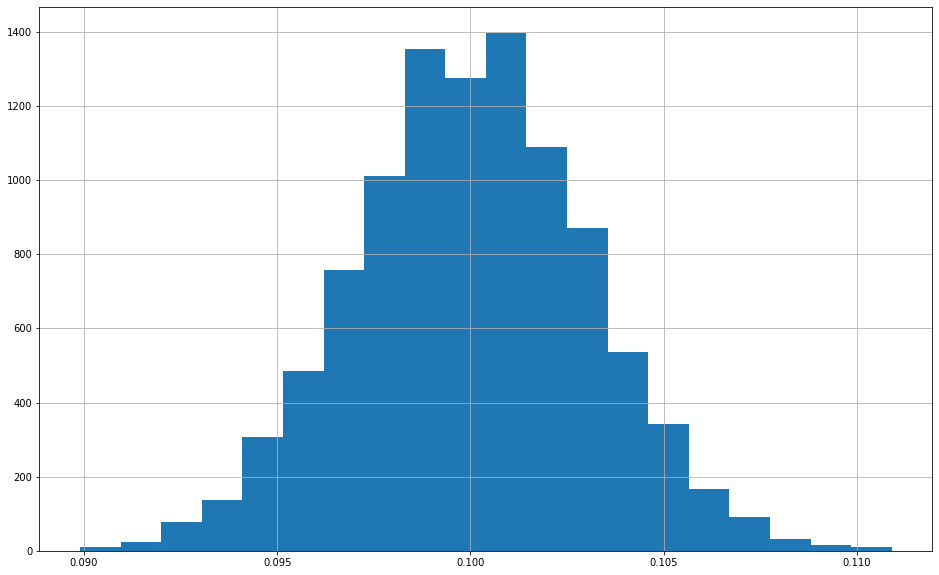

             banker        player           tie
count  10000.000000  10000.000000  10000.000000
mean       0.449946      0.450053      0.100001
std        0.005006      0.004983      0.003035
min        0.431600      0.431000      0.089900
25%        0.446600      0.446800      0.098000
50%        0.449900      0.450000      0.100000
75%        0.453300      0.453500      0.102000
max        0.470000      0.468300      0.110900


In [6]:
# Test case 4
# * test the error rate with defined sample size
num_test = 10 * 1000
num_matches = 10 * 1000
bets = [
    {'bet': BET_BANKER, 'amount': 10},
    {'bet': BET_PLAYER, 'amount': 10},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 4 - Sample size variation:</h1>'))
display(HTML('<p>Number of test: {0}</p>'.format(num_test)))
display(HTML('<p>Samples size: {0}</p>'.format(num_matches)))
results_df = pd.DataFrame()
for imatch, num_matches in enumerate(test_matches):
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    results = []
    for i in range(num_matches):
        result = baccarat.deal()
        results.append(result)
    result_df = pd.DataFrame(data=results, columns=['result'])
    result_value_counts = result_df['result'].value_counts(normalize=True)
    results_df = results_df.append(result_value_counts, ignore_index=True)
results_df.plot.box(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.show()
results_df[BET_BANKER].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
results_df[BET_PLAYER].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
results_df[BET_TIE].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
print(results_df.describe())


In [7]:
display(HTML('<h1>All tests finished.</h1>'))
